<a href="https://colab.research.google.com/github/karsarobert/DeepLearning2024/blob/main/06/PTE_DL6_ENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import data from CSV file to Pandas DataFrame
import pandas as pd
dataframe = pd.read_csv('file.csv')

# Read data from URL to Pandas DataFrame
import pandas as pd
dataframe = pd.read_csv('http://url/file.csv')

# Convert data to NumPy array
import pandas as pd
data = dataframe.values

# Extract labels from the last column
labels = data[:, -1]

# Get data from all columns except the last one
data = data[:, 0:-1]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize data to interval [0, 1] with TensorFlow
import tensorflow as tf
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)
X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data type to float32 with TensorFlow
import tensorflow as tf
X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

# Convert to a logical array
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# Filter normal data by logical indexing
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

# Filter anomalous data with negated logical indexing
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

# Count unique values in a NumPy array
import numpy as np
unique, counts = np.unique(y, return_counts=True)

# One-hot encoding with Keras
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Create a sequential model with Keras
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()

# Add a dense layer to the model
model.add(layers.Dense(units=64, activation='relu', input_shape=[input_dim]))

# Add dropout layer
model.add(layers.Dropout(rate=0.3))

# Add batch normalization
model.add(layers.BatchNormalization())

# Add output layer for regression
model.add(layers.Dense(units=1))

# Add output layer for binary classification
model.add(layers.Dense(units=1, activation='sigmoid'))

# Add output layer for multiclass classification
model.add(layers.Dense(units=num_classes, activation='softmax'))

# Compile model for regression
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Compile model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile model for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stop callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Fit model to training data with validation and early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[early_stopping], verbose=1)

# Plot learning curves
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make a prediction on new data
predictions = model.predict(X_new)

# Save model
model.save("my_model.h5")

# Load model
from tensorflow import keras
model = keras.models.load_model("my_model.h5")

##Task 1: Housing price forecast (Regression)
Boston Housing Dataset (can be imported from scikit-learn or downloaded as CSV).

Task Description: The goal is to create a model that can predict the price of a house in Boston based on various characteristics such as crime rate in the neighborhood, number of rooms, access to highways, etc.

Solution:

Data scanning and preparation (normalization, splitting into training/test sets).

Building a regression model with dense layers and ReLU activation. Output layer with linear activation.

Model inversion with 'adam' optimizer and 'mae' loss function.

Fitting model to training data, validation on test set with early stopping.

Plot and evaluation of learning curves.

Prediction on new data.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 2.069533586502075


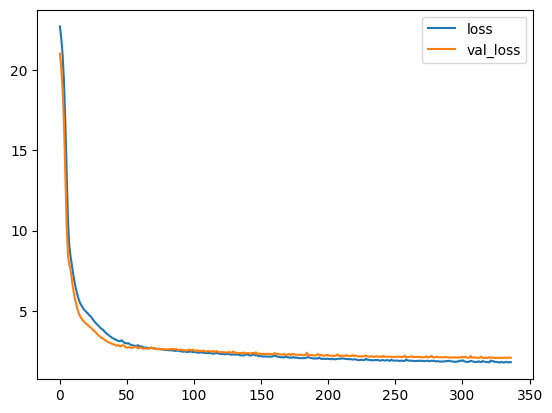

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Adatok betöltése és előkészítése

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]



Task 2: Recognise handwritten digits (Multi-class classification)

Data set: MNIST dataset (can be imported from Keras)

Task description: The objective is to create a model that can recognise handwritten digits (0-9).

Solution:

Data scanning and preparation (normalization, splitting into training/test sets, one-hot encoding on labels).

Building a classification model with dense layers and ReLU activation. Output layer with softmax activation and as many neurons as there are classes (10).

Compile model with 'adam' optimizer and 'categorical_crossentropy' loss function with 'accuracy' metric.

Model fit to training data, validation on test set with early stop.

Plotting and evaluation of learning curves.

Prediction on new images.

Test Loss: 0.0690208151936531
Test Accuracy: 0.9782999753952026


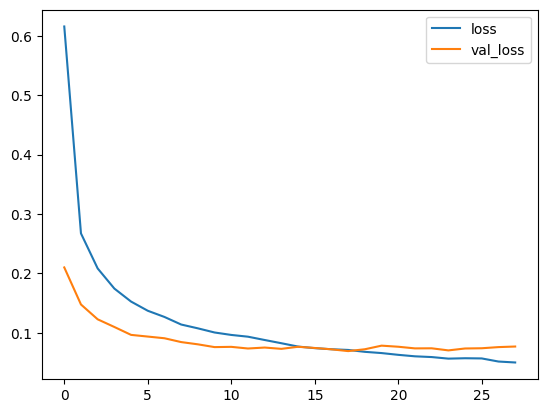

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
import pandas as pd

# Adatok betöltése és előkészítése
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_

Task: anomaly detection in credit card transactions (Binary classification - with autoencoder)

Data set: credit card transaction data (synthetic or publicly available, e.g. from Kaggle), where the minority class is fraudulent transactions.

Task description: the goal is to create a model that can identify suspicious transactions. In this task, we use an autoencoder to learn normal transactions, and we mark transactions with high reconstruction error as anomalies.

Solution:

Data scanning and preparation (normalization, isolation of normal transactions for training).

Autoencoder model construction with dense layers and ReLU activation. The encoding and decoding part should be symmetric.

Compile model with 'adam' optimizer and 'mse' loss function.

Fitting autoencoder to normal transactions.

Determine the threshold of reconstruction error on normal transactions.

Reconstruction of full test set (normal and anomalous transactions).

Detection of anomalies based on the threshold.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4706 - val_loss: 0.3651
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3401 - val_loss: 0.2720
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2522 - val_loss: 0.2066
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1955 - val_loss: 0.1685
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1599 - val_loss: 0.1413
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1335 - val_loss: 0.1197
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1136 - val_loss: 0.1021
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0972 - val_loss: 0.0881
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0841 - val_loss: 0.0771
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0737 - val_loss: 0.0683
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0657 - val_loss: 0.0615
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0595 - val_loss: 0.0560

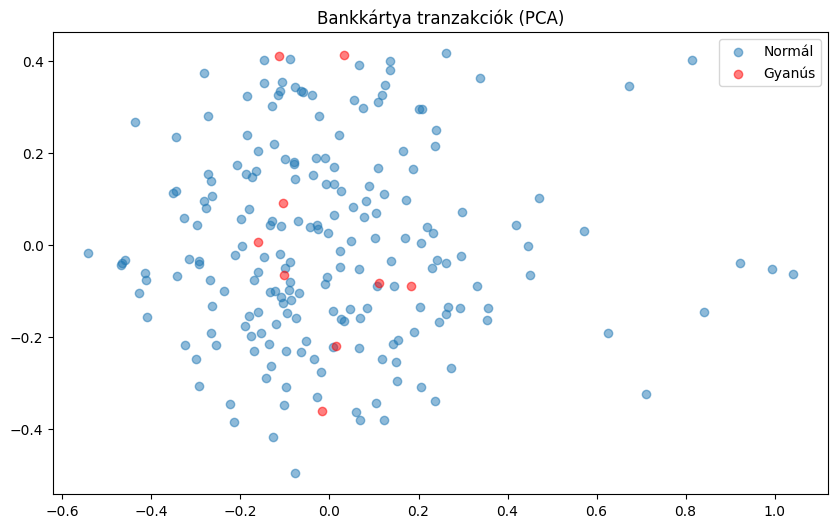

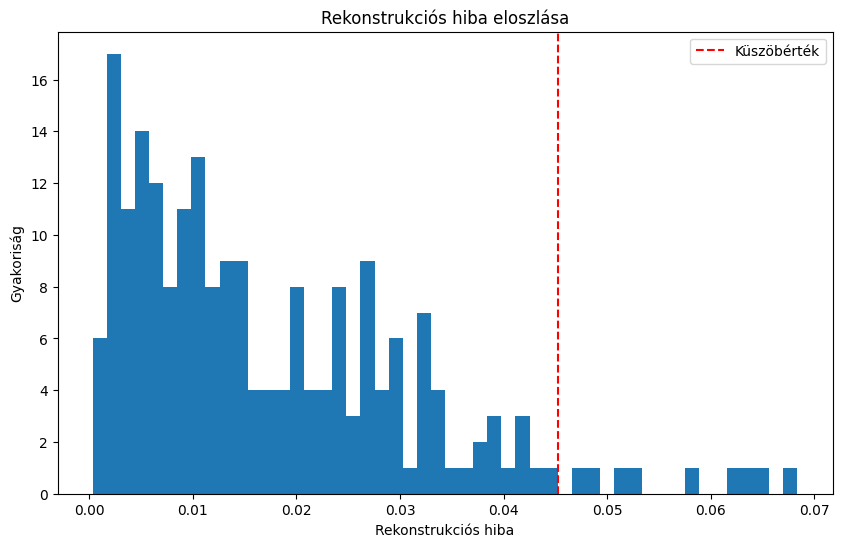

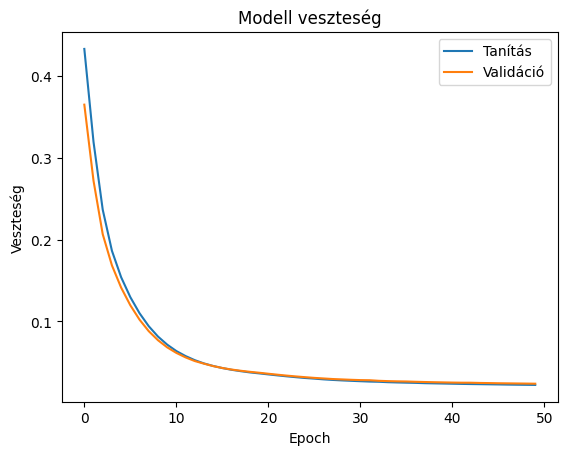

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.models import Model


np.random.seed(42)  # Reprodukálhatóság miatt
n_samples = 1000
n_features = 5  # Pl.: összeg, időpont, helyszín (kódolva), kereskedő (kódolva), tranzakció típusa (kódolva)

normal_transactions = np.random.rand(n_samples, n_features) * 10  # Normál tranzakciók
fraudulent_transactions = np.random.rand(int(n_samples * 0.05), n_features) * 10 + 5 # Csalások, kicsit eltolva az értékek

data = np.concatenate([normal_transactions, fraudulent_transactions])
labels = np.array([0] * len(normal_transactions) + [1] * len(fraudulent_transactions))


In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])